<a href="https://colab.research.google.com/github/pboric/Project-3/blob/main/Data_Viz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will be conducting an exploratory data analysis (EDA) on a dataset of Coursera courses. The goal of this analysis is to gain insights into the characteristics of the courses offered on the platform and understand the relationships between different variables.

The analysis will be conducted in several parts:

1. **Importing necessary libraries**: We will import the necessary Python libraries such as pandas, numpy, matplotlib, seaborn, and scipy that will help us manipulate, analyze, and visualize the data.

2. **Loading the data**: We will load the dataset from a CSV file into a pandas DataFrame, which will allow us to easily manipulate and analyze the data.

3. **Data preprocessing**: We will clean and transform the data to make it suitable for analysis. This includes tasks such as handling missing values, converting data types, and creating new features.

4. **Basic exploratory data analysis (EDA)**: We will calculate and display some descriptive statistics of the data, such as mean, median, standard deviation, and range. This will give us a general understanding of the data's distribution.

5. **Data visualization**: We will create and interpret various plots to show the distributions, relationships, and patterns of the data. This includes histograms, bar charts, and scatter plots. These visualizations will help us better understand the data and draw insights.

Throughout the notebook, we will provide comments and explanations to guide you through the analysis. We hope you find this notebook informative and enjoyable to explore!

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
print("Setup Complete")

Setup Complete


## Loading the data

In [2]:
# Load the dataset
df = pd.read_csv('/content/coursea_data.csv')

## Data preprocessing

In [3]:
# Dropping the first column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'course_students_enrolled' to numeric after removing 'k' and 'm'
df['course_students_enrolled'] = df['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

## Basic EDA

In [4]:
# Display missing values
print("Missing Values:")
for column, count in df.isnull().sum().items():
    print(f"{column}: {count}")

# Basic statistics
basic_stats = df.describe()
print("\nBasic Statistics:\n", basic_stats.to_string())

Missing Values:
course_title: 0
course_organization: 0
course_Certificate_type: 0
course_rating: 0
course_difficulty: 0
course_students_enrolled: 0

Basic Statistics:
        course_rating  course_students_enrolled
count     891.000000              8.910000e+02
mean        4.677329              9.055208e+04
std         0.162225              1.819365e+05
min         3.300000              1.500000e+03
25%         4.600000              1.750000e+04
50%         4.700000              4.200000e+04
75%         4.800000              9.950000e+04
max         5.000000              3.200000e+06


- **Course Rating**: The **average course rating** is approximately **4.68**, with a **standard deviation** of **0.16**. The ratings range from a **minimum** of **3.3** to a **maximum** of **5.0**. The **median rating** is **4.7**, indicating that half of the courses have a rating of 4.7 or higher.

- **Course Students Enrolled**: The **average number of students enrolled in a course** is approximately **90,552**. However, the **standard deviation** is quite large at **181,936**, indicating a wide spread in the number of enrollments. The **minimum number of enrollments** is **1,500**, while the **maximum** is **3,200,000**. The **median number of enrollments** is **42,000**, meaning that half of the courses have 42,000 or fewer enrollments.

## Distributions of Course Ratings and Log Distribution of Course Students Enrolled

Bin range (log distribution) with count of 115: 4.507714746761371 to 4.674167682724582


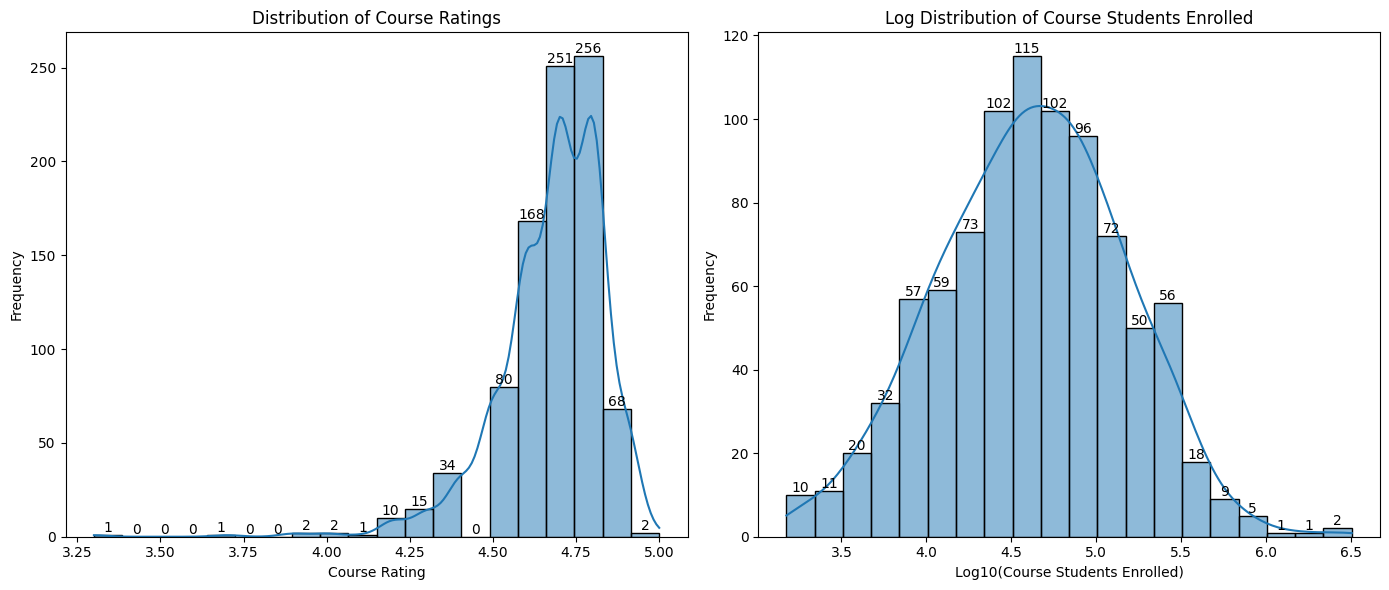

In [5]:
# Defining plot dimensions
plt.figure(figsize=(14, 6))

# Histogram for course ratings
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
histplot_ratings = sns.histplot(df['course_rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
for p in histplot_ratings.patches:
    plt.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

# Histogram for course students enrolled with a logarithmic transformation
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
log_enrollments = np.log10(df['course_students_enrolled'])  # Log-transform the enrollments
histplot_enrollments = sns.histplot(log_enrollments, bins=20, kde=True)
plt.title('Log Distribution of Course Students Enrolled')
plt.xlabel('Log10(Course Students Enrolled)')
plt.ylabel('Frequency')
for p in histplot_enrollments.patches:
    plt.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

# Calculate histogram
counts, bin_edges = np.histogram(log_enrollments, bins=20)

# Print ranges for bins with count of 115
for i in range(len(counts)):
    if counts[i] == 115:
        print(f"Bin range (log distribution) with count of 115: {bin_edges[i]} to {bin_edges[i+1]}")

plt.tight_layout()
plt.show()

- The histogram of distribution of course ratings shows that the majority of courses are rated around 4.75 rating.

- The histogram of log distribution of course students enrolled shows that most of the courses have around 10^4.6 (~ 40000) of students enrolled.

## Median Student Enrollment per Course Difficulty

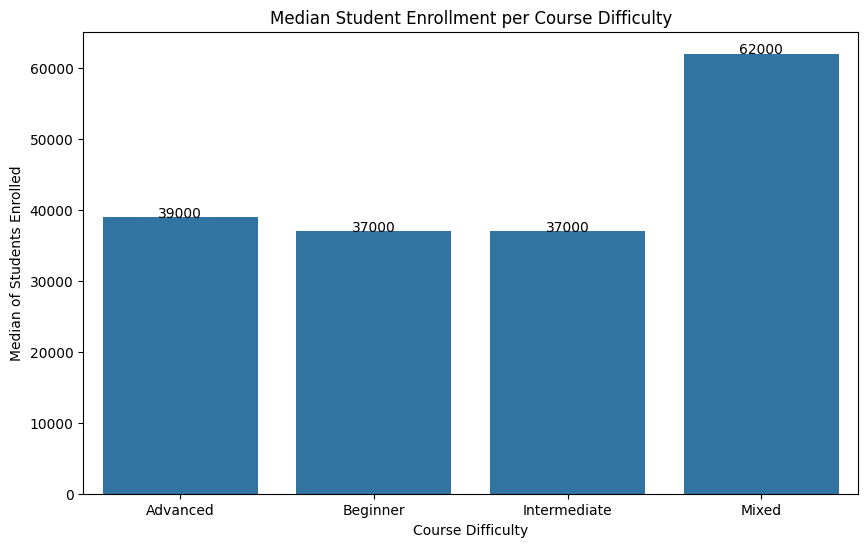

In [6]:
# Calculate median enrollment per difficulty level
median_enrollment_by_difficulty = df.groupby('course_difficulty')['course_students_enrolled'].median().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=median_enrollment_by_difficulty, x='course_difficulty', y='course_students_enrolled')

# Adding the annotation to the bars
for index, row in median_enrollment_by_difficulty.iterrows():
    barplot.text(index, row.course_students_enrolled, round(row.course_students_enrolled), color='black', ha="center")

plt.title('Median Student Enrollment per Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Median of Students Enrolled')
plt.show()

This bar plot shows that the courses with "Mixed" level of dificulty have
the most of the students enrolled.

## Median Enrollment by Type of Course Certificate

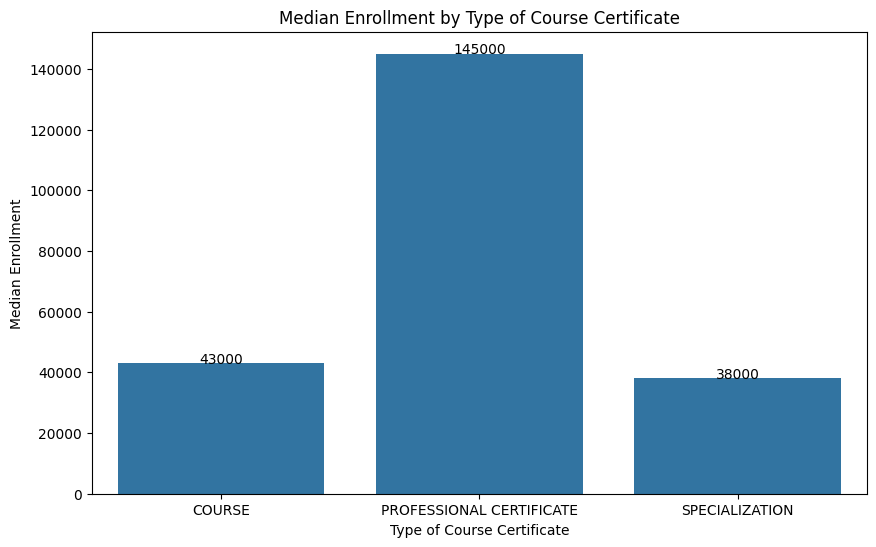

In [21]:
# Group by 'course_Certificate_type' and calculate the median of 'course_students_enrolled'
median_enrollment = df.groupby('course_Certificate_type')['course_students_enrolled'].median()

# Plot a bar chart of the median enrollment by type of course certificate
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=median_enrollment.index, y=median_enrollment.values)
plt.xlabel('Type of Course Certificate')
plt.ylabel('Median Enrollment')
plt.title('Median Enrollment by Type of Course Certificate')

# Annotate bars with their values
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 100, '{:.0f}'.format(height), ha='center')

plt.show()

The "Professional Certificate" courses have the highest average enrollment.

## Student Enrollment by Course Ratings

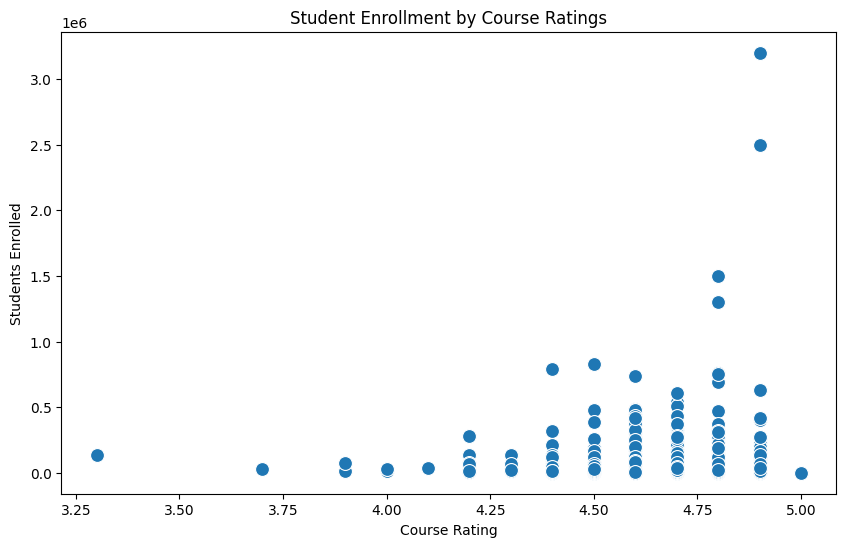

In [23]:
# Creating the scatter plot of student enrollement by course ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='course_rating', y='course_students_enrolled', s=100)  # s is the marker size

plt.title('Student Enrollment by Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')
plt.show()

There is a noticeable trend where courses with higher ratings (closer to 5) have a larger number of students enrolled. Courses rated around 4.75 have the highest enrollment, with one course having 3.2 million students. Courses rated below 4 have significantly fewer students enrolled.

## Top 10 Organizations by Number of Courses Offered

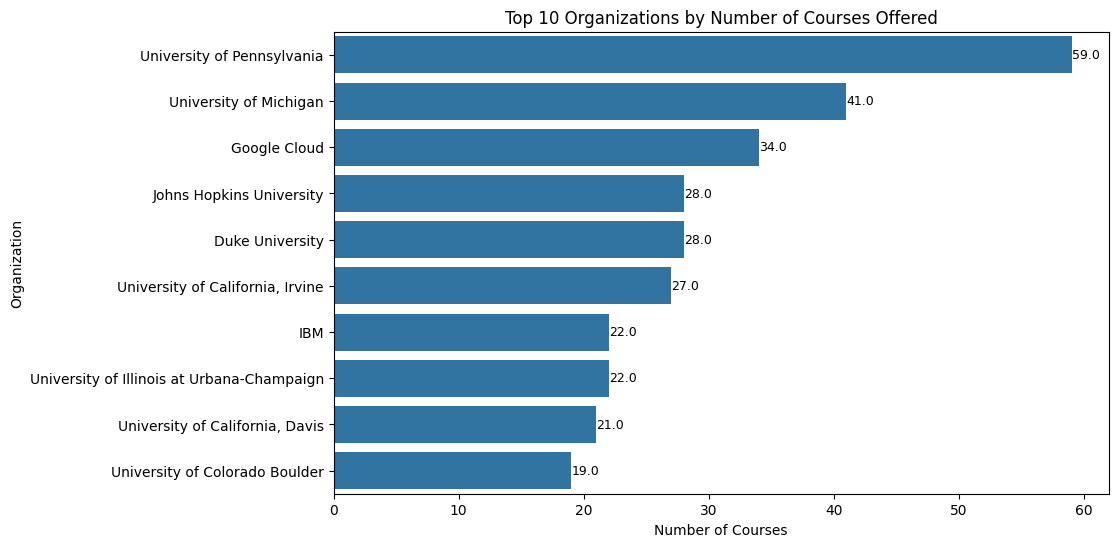

In [14]:
# Calculate the counts of courses offered by each organization
course_counts = df['course_organization'].value_counts()

# Select the top 10 organizations
top_10 = course_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Organizations by Number of Courses Offered')
plt.xlabel('Number of Courses')
plt.ylabel('Organization')

# Add annotations for the number of courses
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width}', ha='left', va='center', fontsize=9, color='black')

plt.show()

Organizations with longer bars offer a larger number of courses.

## Top 10 Organizations by Course Rating, Students Enrolled, and Number of Courses Offered

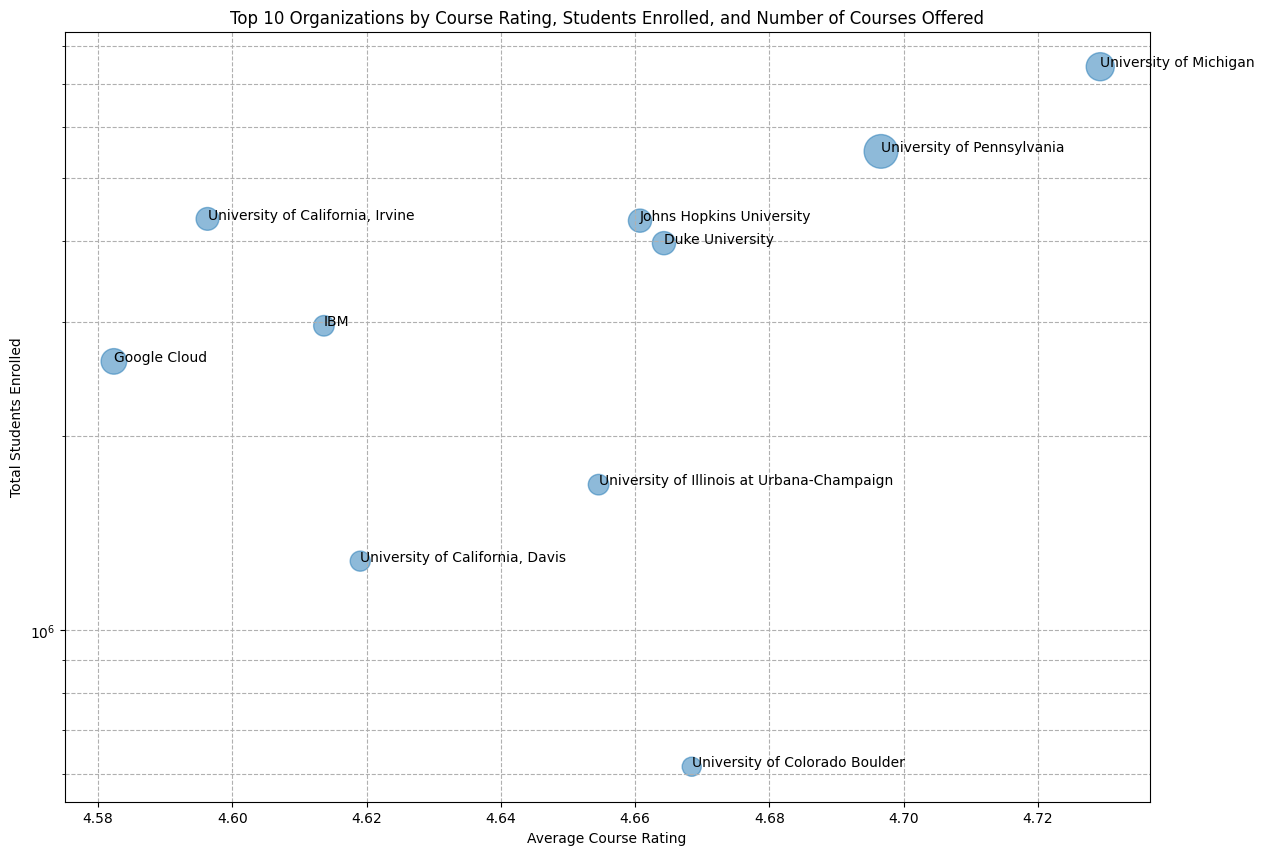

In [20]:
# Group by organization and calculate metrics
grouped = df.groupby('course_organization').agg({
    'course_rating': 'mean',  # Average rating
    'course_students_enrolled': 'sum',  # Total students enrolled
    'course_title': 'count'  # Number of courses offered
}).rename(columns={'course_title': 'number_of_courses'})

# Sort organizations by a composite metric (here, just using number_of_courses for simplicity)
# You might want to create a more complex metric combining all three factors
top_organizations = grouped.sort_values(by='number_of_courses', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 10))
scatter = plt.scatter(top_organizations['course_rating'], top_organizations['course_students_enrolled'],
                      s=top_organizations['number_of_courses']*10,  # Size by number of courses
                      alpha=0.5)

# Adding titles and labels
plt.title('Top 10 Organizations by Course Rating, Students Enrolled, and Number of Courses Offered')
plt.xlabel('Average Course Rating')
plt.ylabel('Total Students Enrolled')
plt.xscale('linear')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True, which="both", ls="--")

# Adding annotations for organization names
for i, row in top_organizations.iterrows():
    plt.annotate(i, (row['course_rating'], row['course_students_enrolled']))

plt.show()

The size of each point is reflecting the number of courses offered by respective organization. The **most reputable** organization by comparing course rating, students enrolled, and number of courses offered is **University of Michigan**.

# Conclusion

In conclusion, this analysis has highlighted several factors that may contribute to the success of a course on Coursera, such as high ratings, the type of certificate offered, and the reputation of the offering organization. These insights could be useful for course providers when designing and marketing their courses.

# Suggestions

Here are a few suggestions that could further enhance this analysis:

- **Correlation Analysis**: A correlation analysis could be conducted between numerical variables such as ‘course_rating’ and ‘course_students_enrolled’. This could provide insights into whether higher-rated courses tend to have more enrollments.

- **Time-Series Analysis**: If the dataset includes temporal information (like the date when the course was offered), you could conduct a time-series analysis to identify trends over time.

- **Text Analysis**: The ‘course_title’ or ‘course_organization’ text data could be analyzed to find the most common words or phrases using techniques like word clouds or TF-IDF (Term Frequency-Inverse Document Frequency).

- **Hypothesis Testing**: If there are hypotheses about the data, statistical tests could be conducted to confirm or reject those hypotheses. For example, you might want to test if the average rating differs based on the ‘course_difficulty’ level.

- **Machine Learning Models**: If the goal is prediction (e.g., predicting the number of enrollments based on other features), you could build and evaluate machine learning models using this dataset.